<a href="https://colab.research.google.com/github/elsy-torres/script/blob/main/TF-intento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TRANSFORMADA DE UN SISMOGRAMA
## Los datos fueron proporcionados por el Dr. Chang 2020.

#Importar librerías

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import signal
from scipy import fftpack

# Cargar datos de un txt


In [61]:
data=pd.read_csv('NZ007.txt',names=['time','amp'],skiprows=3,sep='\s+',engine='python')
data.head(10)

,time,amp
0,0.00,-0.244690
1,0.02,0.055570
2,0.04,0.034080
3,0.06,-0.035078
4,0.08,0.065622
5,0.10,0.045962
6,0.12,0.007326
7,0.14,-0.012271
8,0.16,-0.046718
9,0.18,-0.049188


In [ ]:
data.tail()


In [36]:
print(len(data))

16448


In [40]:
1/328.94

0.0030400680975253844

In [ ]:
data.info()

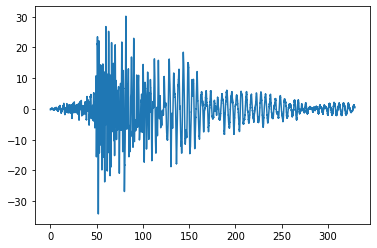

In [38]:
plt.plot(data['time'],data['amp'])

# Declarar el vector x en el dominio de la frecuencia

In [80]:
fo=1/328.94
data['W']=2*np.pi*data['freq']
data['freq']=np.arange(0,len(data)*fo,step=fo)
print(data)

         time       amp      freq  ...        asb      fase           W
0        0.00 -0.244690   0.00000  ...  13.838794  0.000000    0.000000
1        0.02  0.055570   0.00304  ...  48.436642  0.476483    0.019101
2        0.04  0.034080   0.00608  ...  29.586347  1.465820    0.038203
3        0.06 -0.035078   0.00912  ...  59.707817  1.167415    0.057304
4        0.08  0.065622   0.01216  ...  43.373308 -1.020299    0.076405
...       ...       ...       ...  ...        ...       ...         ...
16443  328.86  0.727160  49.98784  ...  59.561601  1.505522  314.082860
16444  328.88  0.617360  49.99088  ...  43.373308  1.020299  314.101961
16445  328.90  0.549910  49.99392  ...  59.707817 -1.167415  314.121063
16446  328.92  0.599760  49.99696  ...  29.586347 -1.465820  314.140164
16447  328.94  0.410800  50.00000  ...  48.436642 -0.476483  314.159265

[16448 rows x 9 columns]


In [63]:
data.tail()

,time,amp,freq
16443,328.86,0.72716,49.98784
16444,328.88,0.61736,49.99088
16445,328.90,0.54991,49.99392
16446,328.92,0.59976,49.99696
16447,328.94,0.41080,50.00000


# Aplicar un filtro a la serie de tiempo antes de realizar la FT


In [ ]:
data=data.drop('filtro1',axis=1)

In [64]:
data['filtro']=1
data

,time,amp,freq,filtro
0,0.00,-0.244690,0.00000,1
1,0.02,0.055570,0.00304,1
2,0.04,0.034080,0.00608,1
3,0.06,-0.035078,0.00912,1
4,0.08,0.065622,0.01216,1
...,...,...,...,...
16443,328.86,0.727160,49.98784,1
16444,328.88,0.617360,49.99088,1
16445,328.90,0.549910,49.99392,1
16446,328.92,0.599760,49.99696,1


In [65]:
data['filtro'].iloc[data.index<1000]=signal.cosine(1000)
data['filtro'].iloc[data.index>15447]=signal.cosine(1000)
data.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,time,amp,freq,filtro
16443,328.86,0.72716,49.98784,0.014137
16444,328.88,0.61736,49.99088,0.010995
16445,328.90,0.54991,49.99392,0.007854
16446,328.92,0.59976,49.99696,0.004712
16447,328.94,0.41080,50.00000,0.001571


In [66]:
data['signal_filter']= data['filtro']*data['amp']

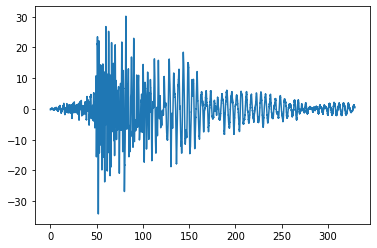

In [67]:
plt.plot(data['time'],data['amp'])

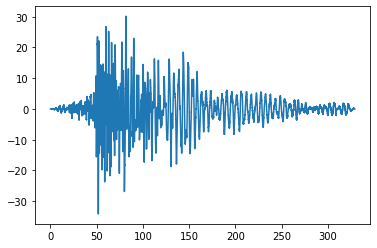

In [68]:
plt.plot(data['time'],data['signal_filter'])

# Realizar FT

In [69]:
data['fft']=np.fft.fft(data['signal_filter'])
data.head(5)

,time,amp,freq,filtro,signal_filter,fft
0,0.00,-0.244690,0.00000,0.001571,-0.000384,13.838794-0.000000j
1,0.02,0.055570,0.00304,0.004712,0.000262,43.041462+22.215780j
2,0.04,0.034080,0.00608,0.007854,0.000268,3.100171+29.423475j
3,0.06,-0.035078,0.00912,0.010995,-0.000386,23.437134+54.915609j
4,0.08,0.065622,0.01216,0.014137,0.000928,-22.689074+36.965522j


# Calcular la amplitud de la TF

In [70]:
data['asb']= np.abs(data['fft'])
data.head(5)

,time,amp,freq,filtro,signal_filter,fft,asb
0,0.00,-0.244690,0.00000,0.001571,-0.000384,13.838794-0.000000j,13.838794
1,0.02,0.055570,0.00304,0.004712,0.000262,43.041462+22.215780j,48.436642
2,0.04,0.034080,0.00608,0.007854,0.000268,3.100171+29.423475j,29.586347
3,0.06,-0.035078,0.00912,0.010995,-0.000386,23.437134+54.915609j,59.707817
4,0.08,0.065622,0.01216,0.014137,0.000928,-22.689074+36.965522j,43.373308


# Calcular la fase de la TF

In [72]:
data['fase'].iloc[0]=0

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [71]:
data['fase']=np.arctan(data['fft'].values.imag/data['fft'].values.real)
data.head(5)

,time,amp,freq,filtro,signal_filter,fft,asb,fase
0,0.00,-0.244690,0.00000,0.001571,-0.000384,13.838794-0.000000j,13.838794,-1.026885e-15
1,0.02,0.055570,0.00304,0.004712,0.000262,43.041462+22.215780j,48.436642,4.764827e-01
2,0.04,0.034080,0.00608,0.007854,0.000268,3.100171+29.423475j,29.586347,1.465820e+00
3,0.06,-0.035078,0.00912,0.010995,-0.000386,23.437134+54.915609j,59.707817,1.167415e+00
4,0.08,0.065622,0.01216,0.014137,0.000928,-22.689074+36.965522j,43.373308,-1.020299e+00


In [49]:
data.tail()

,time,amp,filtro,signal_filter,fft,asb,fase
16443,328.86,0.72716,0.014137,0.010280,-3.885055-59.434760j,59.561601,1.505522
16444,328.88,0.61736,0.010995,0.006788,-22.689074-36.965522j,43.373308,1.020299
16445,328.90,0.54991,0.007854,0.004319,23.437134-54.915609j,59.707817,-1.167415
16446,328.92,0.59976,0.004712,0.002826,3.100171-29.423475j,29.586347,-1.465820
16447,328.94,0.41080,0.001571,0.000645,43.041462-22.215780j,48.436642,-0.476483


# Señal en el dominio del tiempo

In [ ]:
plt.plot(data['time'],data['amp'])

# Señal en el dominio de la frecuencia 

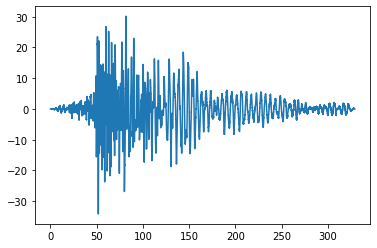

In [51]:
plt.plot(data['time'],data['signal_filter'])

# Espectro de Amplitud

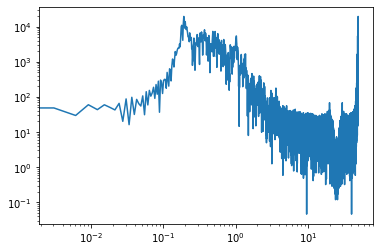

In [74]:
plt.loglog(data['freq'],data['asb'])

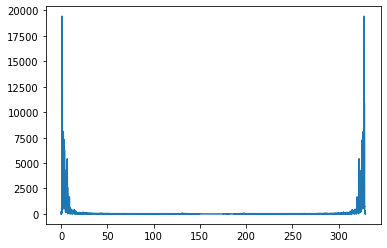

In [55]:
plt.plot(data['time'],data['asb'])

# Espectro de Fase

In [ ]:
plt.loglog(data['freq'],data['fase'],'r*')

In [ ]:
plt.loglog(data['time'],data['fase'])